In [1]:
import tensorflow.keras as keras # Import the keras module

vocab_size = 10000
embedding_dim = 128
max_length = 200

model = keras.Sequential(
    [keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
     keras.layers.LSTM(64, return_sequences=True),
     keras.layers.LSTM(32),
     keras.layers.Dense(24, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [2]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define el tamaño del vocabulario y las oraciones de entrenamiento
vocab_size = 1000
training_sentences = ["Hola, ¿cómo estás?", "Estoy bien, gracias."]
training_labels = [0, 1]  # Etiquetas correspondientes a las oraciones

# Crea un tokenizador y ajusta a las oraciones de entrenamiento
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)


# Convierte las oraciones en secuencias de números
sequences = tokenizer.texts_to_sequences(training_sentences)
print(sequences)


[[2, 3, 4], [5, 6, 7]]


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5000 - loss: 0.6935 - val_accuracy: 0.4000 - val_loss: 0.6978
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.4000 - val_loss: 0.6971
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.6965
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.6959
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6953
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6948
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss: 0.6943
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4000 - val_loss:

<Axes: >

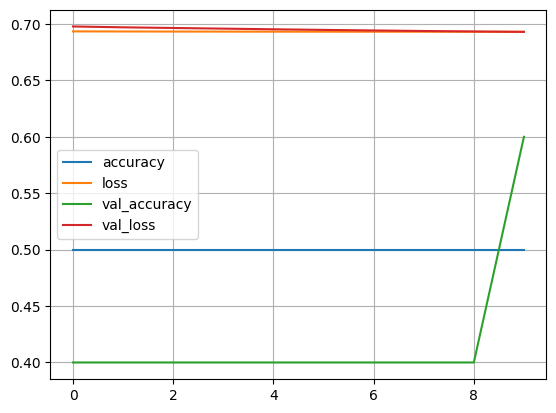

In [17]:

padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Make sure the number of training labels matches the number of training samples
training_labels = np.array([0, 1]) # The labels should correspond one-to-one with training sentences

testing_labels = np.array([1, 0, 1, 0, 1]) # Replace with your actual testing labels, one for each testing sentence
testing_sentences = ["Excelente experiencia", "Pésimo","Este producto es genial!", "No me gustó este servicio.", "La comida estuvo deliciosa."] # Replace with your actual testing sentences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
test_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

# Convert padded sequences to NumPy arrays
padded = np.array(padded)
test_padded = np.array(test_padded)

history = model.fit(padded, training_labels, epochs=num_epochs,
                    validation_data=(test_padded, testing_labels))

#Graficar
import pandas as pd # Import pandas for plotting
pd.DataFrame(history.history).plot(grid=True)